In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime

In [2]:
# Effective dates on the EV charging dataset
# Label the working days and non-working days in 2019 in USA

start = datetime(2019,1,1)
end = datetime(2019,12,31)
weekday_index = pd.bdate_range(start, end)
weekday_list = weekday_index.strftime("%Y-%m-%d").tolist()
wholeyear_index = pd.date_range(start, end)
wholeyear_list = wholeyear_index.strftime("%Y-%m-%d").tolist()

from pandas.tseries.holiday import USFederalHolidayCalendar
cal = USFederalHolidayCalendar()
holiday_index = cal.holidays(start = "2019-01-01", end = "2019-12-31")
holiday_list = holiday_index.strftime("%Y-%m-%d").tolist() 

wd_list = [i for i in weekday_list if i not in holiday_list]
nwd_list = [i for i in wholeyear_list if i not in wd_list]

No_data_wd = ["2019-12-05","2019-12-06","2019-12-09","2019-12-10","2019-12-31"]
wd_list_effective = [i for i in wd_list if i not in No_data_wd]
wd_list_effective.append("2019-10-14")
wd_list_effective.append("2019-11-11")

# 2019-10-14，2019-11-11大功率
# 2019-01-19，2019-05-27，2019-10-20负数
No_data_nwd = ["2019-01-19","2019-01-20",
               "2019-02-16",
               "2019-04-14","2019-04-28",
               "2019-05-25","2019-05-27",
               "2019-08-17",
               "2019-10-20",
               "2019-11-28","2019-11-30",
               "2019-12-07","2019-12-08","2019-12-22","2019-12-25"]

nwd_list_effective = [i for i in nwd_list if i not in No_data_nwd]
nwd_list_effective = [i for i in nwd_list_effective if i not in ["2019-10-14","2019-11-11"]]

date_linear = ["2019-01-01","2019-03-03","2019-08-31","2019-09-01","2019-12-26"]

# 点太少了，无法拟合出合适的函数，当作异常点处理:"2019-01-01"，"2019-03-03"
# 真的完全服从一条直线，指数函数无法拟合："2019-12-26"，"2019-08-31"，"2019-09-01"
# 服从指数函数的点："2019-01-27","2019-02-02","2019-02-18","2019-07-04","2019-07-05","2019-08-10","2019-08-18","2019-09-08"，
# "2019-10-06"，"2019-11-24","2019-11-29"

wholeyear_effective = [i for i in wholeyear_list if i not in No_data_nwd]
wholeyear_effective = [i for i in wholeyear_effective if i not in No_data_wd]
# len(wholeyear_effective)

In [8]:
len(wd_list_effective)

248

In [77]:
holiday_effective = [i for i in nwd_list_effective if i in holiday_list]
len(holiday_effective)

5

In [78]:
weekend_list_effective = [i for i in nwd_list_effective if i not in holiday_list]
len(weekend_list_effective)

92

In [31]:
# output the numbers of the weekdays, weekends, and holidays for the experimental dates and its 7-day historical dates
def stats_dates(EVC_workplace,num_charger):
    """
    EVC_workplace: EV charging data in the workplace for the whole year,df
    random_seed: the value of the random seed for np.random.seed, float
    """
    # EV充电数据含有的日子
    Dates = (EVC_workplace["connect_date"].unique().tolist())
    Dates_wd = [i for i in Dates if i in wd_list_effective]
    
    # set up the df to store the experimental dates and the associated historical dates in the list format.
    Dates_list = pd.DataFrame(index = range(40,70))
    
    # 随机抽取日期
    for i in range(40,70):
        np.random.seed(i) 
        Date = np.random.choice(Dates_wd)
        Date = pd.to_datetime(Date)
        historical_dates = [Date - pd.DateOffset(days=i) for i in range(1,7+1)]
        Dates_list.loc[i,0] = Date.strftime('%Y-%m-%d') # from timestamps to str
        for j,date in enumerate(historical_dates):
            Dates_list.loc[i,j+1] = date.strftime('%Y-%m-%d')
    
    # inital the dates to be counted
    num_wd = 0
    num_weekend = 0
    num_holiday = 0
    Stats = pd.DataFrame(index = [num_charger], columns = ["workday","weekend","holiday"])
    for col in Dates_list:
        for item in Dates_list[col]:
            if item in wd_list_effective:
                num_wd += 1
            elif item in holiday_list:
                num_holiday += 1
            else:
                num_weekend += 1
    Stats.loc[num_charger] = [num_wd,num_weekend,num_holiday]
    
    return Stats

In [48]:
EVC_workplace_annual_10 = pd.read_csv("./result/EVC/EVC_workplace_10.csv",index_col=0)
stats_10 = stats_dates(EVC_workplace_annual_10,10)
stats_10

,workday,weekend,holiday
10,173,64,3


In [49]:
EVC_workplace_annual_50 = pd.read_csv("./result/EVC/EVC_workplace_50.csv",index_col=0)
stats_50 = stats_dates(EVC_workplace_annual_50,50)
stats_50

,workday,weekend,holiday
50,172,64,4


In [50]:
EVC_workplace_annual_90 = pd.read_csv("./result/EVC/EVC_workplace_90.csv",index_col=0)
stats_90 = stats_dates(EVC_workplace_annual_90,90)
stats_90

,workday,weekend,holiday
90,170,66,4


In [51]:
EVC_workplace_annual_130 = pd.read_csv("./result/EVC/EVC_workplace_130.csv",index_col=0)
stats_130 = stats_dates(EVC_workplace_annual_130,130)
stats_130

,workday,weekend,holiday
130,170,64,6


In [52]:
EVC_workplace_annual_170 = pd.read_csv("./result/EVC/EVC_workplace_170.csv",index_col=0)
stats_170 = stats_dates(EVC_workplace_annual_170,170)
stats_170

,workday,weekend,holiday
170,169,64,7


In [53]:
EVC_workplace_annual_210 = pd.read_csv("./result/EVC/EVC_workplace_210.csv",index_col=0)
stats_210 = stats_dates(EVC_workplace_annual_210,210)
stats_210

,workday,weekend,holiday
210,173,64,3


In [54]:
EVC_workplace_annual_250 = pd.read_csv("./result/EVC/EVC_workplace_250.csv",index_col=0)
stats_250 = stats_dates(EVC_workplace_annual_250,250)
stats_250

,workday,weekend,holiday
250,171,64,5


In [55]:
EVC_workplace_annual_290 = pd.read_csv("./result/EVC/EVC_workplace_290.csv",index_col=0)
stats_290 = stats_dates(EVC_workplace_annual_290,290)
stats_290

,workday,weekend,holiday
290,169,67,4


In [56]:
EVC_workplace_annual_330 = pd.read_csv("./result/EVC/EVC_workplace_330.csv",index_col=0)
stats_330 = stats_dates(EVC_workplace_annual_330,330)
stats_330

,workday,weekend,holiday
330,173,64,3


In [57]:
EVC_workplace_annual_370 = pd.read_csv("./result/EVC/EVC_workplace_370.csv",index_col=0)
stats_370 = stats_dates(EVC_workplace_annual_370,370)
stats_370

,workday,weekend,holiday
370,166,68,6


In [58]:
EVC_workplace_annual_410 = pd.read_csv("./result/EVC/EVC_workplace_410.csv",index_col=0)
stats_410 = stats_dates(EVC_workplace_annual_410,410)
stats_410

,workday,weekend,holiday
410,167,70,3


In [59]:
EVC_workplace_annual_450 = pd.read_csv("./result/EVC/EVC_workplace_450.csv",index_col=0)
stats_450 = stats_dates(EVC_workplace_annual_450,450)
stats_450

,workday,weekend,holiday
450,172,64,4


In [62]:
stats = pd.concat(
    [
        stats_10,stats_50,stats_90,stats_130,stats_170,stats_210,stats_250,
        stats_290,stats_330,stats_370,stats_410,stats_450
    ]
    ,axis = 0)

In [63]:
stats

,workday,weekend,holiday
10,173,64,3
50,172,64,4
90,170,66,4
130,170,64,6
170,169,64,7
210,173,64,3
250,171,64,5
290,169,67,4
330,173,64,3
370,166,68,6


In [69]:
stats_percent = [i/stats.sum().sum() * 100 for i in stats.sum()]
stats_percent

[71.00694444444444, 27.187499999999996, 1.8055555555555554]

In [80]:
stan = [len(wd_list_effective),len(weekend_list_effective),len(holiday_effective)]
stats_percent_stan = [i/sum(stan) * 100 for i in stan]
stats_percent_stan

[71.8840579710145, 26.666666666666668, 1.4492753623188406]

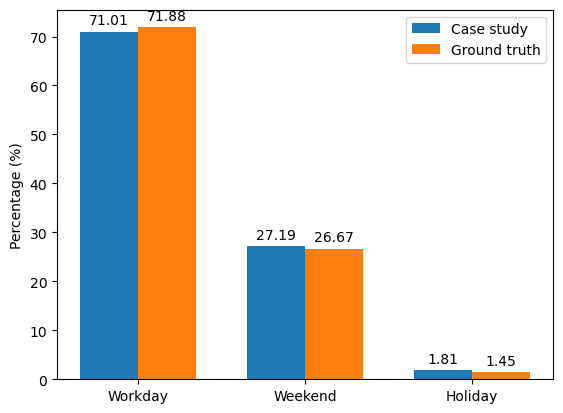

In [85]:
# 假设这是你的两个列表
list1 = stats_percent
list2 = stats_percent_stan

# 设置数据
labels = ['Workday', 'Weekend', 'Holiday']
x = np.arange(len(labels))  # 标签位置
width = 0.35  # 柱子的宽度

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, list1, width, label='Case study')
rects2 = ax.bar(x + width/2, list2, width, label='Ground truth')

# 添加文本标签
def add_labels(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{:.2f}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

add_labels(rects1)
add_labels(rects2)

# 添加一些文本标签
ax.set_ylabel('Percentage (%)')
# ax.set_title('Comparison of Two Lists')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

plt.savefig("./result/Figure/Bars of composition of experimental dates.svg",bbox_inches='tight')

# 显示图形
plt.show()